In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras as keras
import pandas as pd 





2024-06-12 11:30:57.908029: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load synthetic regression data

In [16]:
df=pd.read_csv('./synth_data/circular_sep.csv')
input_feat=df[['x','y']].values
labels=df['label'].values
num_classes=len(np.unique(labels))
print (type(input_feat),input_feat.shape,type(labels),labels.shape)

<class 'numpy.ndarray'> (60000, 2) <class 'numpy.ndarray'> (60000,)


## Data Visualization
We visualize a small subset of the data using matplotlib

[0. 0. 0. ... 2. 2. 2.] (60000,)


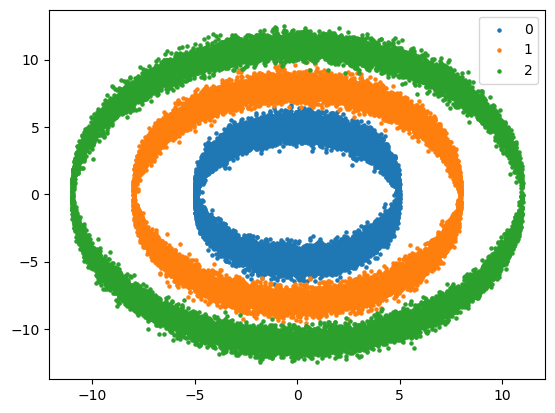

In [17]:
choice=np.random.randint(0,len(input_feat),1000)
print (labels,labels.shape)
plt.scatter(input_feat[:,0][labels==0],input_feat[:,1][labels==0],label=0,s=5)
plt.scatter(input_feat[:,0][labels==1],input_feat[:,1][labels==1],label=1,s=5)
plt.scatter(input_feat[:,0][labels==2],input_feat[:,1][labels==2],label=2,s=5)
plt.legend()

## Divide training and validation datasets
We divide the x and y value to training and validation datasets using numpy methods. 
It is also available in scikit-learn as [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) 

In [18]:
#labels
one_hot=np.zeros((len(labels),len(np.unique(labels))))
#print (one_hot,type(labels),labels.dtype)
one_hot[np.arange(len(labels)),labels.astype(int)]=1.

In [20]:
all_inds=np.arange(len(input_feat))
np.random.seed(145431)
np.random.shuffle(all_inds)
split_point=int(0.75*len(input_feat))
x_train,y_train=input_feat[all_inds[:split_point]],one_hot[all_inds[:split_point]]
x_val,y_val=input_feat[all_inds[split_point:]],one_hot[all_inds[split_point:]]
print (x_train.shape,y_train.shape)
print (x_val.shape,y_val.shape)

(45000, 2) (45000, 3)
(15000, 2) (15000, 3)


## Create Sequential model 
We create a model using the Sequential API of keras. You can play around with the width and depth of the network to see the speed and the accuracy of the function approximation, and the speed of training for broader vs deeper networks. 

In [21]:
width=100
depth=3

model=Sequential()
model.add(Dense(width,input_shape=(2,),activation="relu",bias_initializer="glorot_normal"))
for _ in range(depth-1):
    model.add(Dense(width,activation="relu"))
model.add(Dense(num_classes,activation="linear"))
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['acc'],
              optimizer=keras.optimizers.Adam()
             )
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               300       
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 3)                 303       
                                                                 
Total params: 20,803
Trainable params: 20,803
Non-trainable params: 0
_________________________________________________________________


## Training the model
We train the compiled model using the inbuilt fit method of keras models, and compare the predicted output of the network for each $n$ epochs. Note that we have used epoch=1 in the input to the fit method for each of handling the plotting. For actual training purposes, the number of epochs should be directly fed into the fit method.

In [22]:
history=model.fit(x_train,y_train,epochs=10,batch_size=100,verbose=1,validation_data=(x_val,y_val))


Epoch 1/10
450/450 [==============================] - 1s 1ms/step - loss: 0.2357 - acc: 0.8973 - val_loss: 0.0114 - val_acc: 0.9969
Epoch 2/10
450/450 [==============================] - 1s 1ms/step - loss: 0.0095 - acc: 0.9973 - val_loss: 0.0431 - val_acc: 0.9839
Epoch 3/10
450/450 [==============================] - 1s 1ms/step - loss: 0.0062 - acc: 0.9978 - val_loss: 0.0046 - val_acc: 0.9988
Epoch 4/10
450/450 [==============================] - 1s 1ms/step - loss: 0.0093 - acc: 0.9965 - val_loss: 0.0071 - val_acc: 0.9975
Epoch 5/10
450/450 [==============================] - 1s 1ms/step - loss: 0.0064 - acc: 0.9977 - val_loss: 0.0027 - val_acc: 0.9993
Epoch 6/10
450/450 [==============================] - 1s 1ms/step - loss: 0.0065 - acc: 0.9978 - val_loss: 0.0086 - val_acc: 0.9973
Epoch 7/10
450/450 [==============================] - 1s 1ms/step - loss: 0.0084 - acc: 0.9969 - val_loss: 0.0030 - val_acc: 0.9990
Epoch 8/10
450/450 [==============================] - 1s 1ms/step - loss: 0.

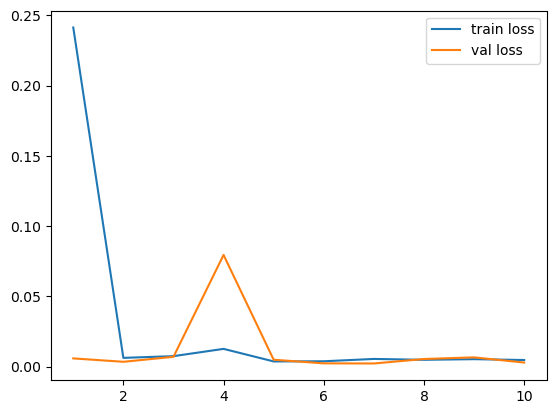

In [11]:
history_dict=history.history
epoch=list(range(1,len(history_dict['loss'])+1))
plt.plot(epoch,history_dict['loss'],label='train loss')
plt.plot(epoch,history_dict['val_loss'],label='val loss')
plt.legend()

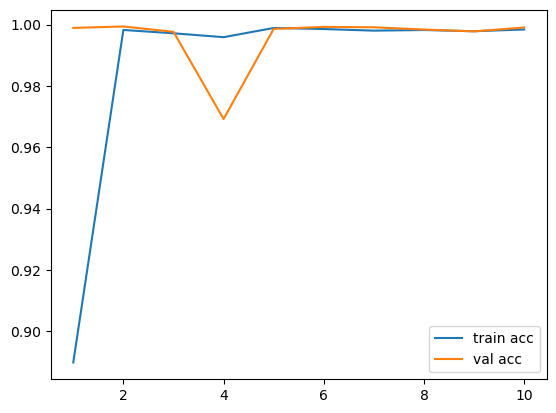

In [12]:
plt.plot(epoch,history_dict['acc'],label='train acc')
plt.plot(epoch,history_dict['val_acc'],label='val acc')
plt.legend()